In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\FlipRobo\24 April Project Deadline\Avocado.xlsx")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index([  'Unnamed: 0',         'Date', 'AveragePrice', 'Total Volume',
                 4046,           4225,           4770,   'Total Bags',
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
               'year',       'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.isnull().sum()  

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [9]:
df.drop("Unnamed: 0",inplace=True,axis=1)

# EDA

<AxesSubplot:title={'center':'AveragePrice Distribution'}, xlabel='AveragePrice', ylabel='Density'>

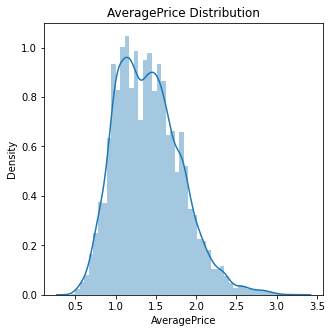

In [10]:
plt.figure(figsize=(5,5))
plt.title("AveragePrice Distribution")
sns.distplot(df['AveragePrice'])

Average price of Avocado are distributed between 0.5 to 3.4.

conventional    9126
organic         9123
Name: type, dtype: int64

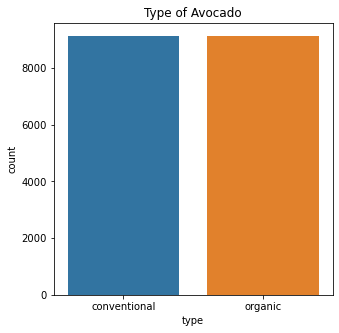

In [11]:
plt.figure(figsize=(5,5))
plt.title("Type of Avocado")
sns.countplot(x='type',data=df)
df["type"].value_counts()

Two types of Avocado:
    -Conventional(9126)
    -Organic(9123)

<AxesSubplot:title={'center':'Type of Avocado vs Average Price'}, xlabel='type', ylabel='AveragePrice'>

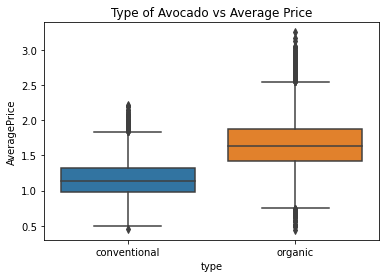

In [12]:
plt.title("Type of Avocado vs Average Price")
sns.boxplot(x="type", y="AveragePrice", data=df)

Organic Avocado are expensive than Conventional Avocado.
Average price of Organic Avocado are more than Conventional Avocado

Text(0, 0.5, '')

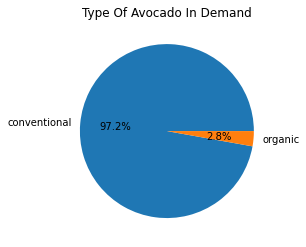

In [13]:
Type=df.groupby('type')['Total Volume'].sum()
Type.plot.pie(autopct='%1.1f%%')
plt.title('Type Of Avocado In Demand')
plt.ylabel('')

97.2% people consume Conventional Avocado.
Conventional Avocado are more in Demand.

<AxesSubplot:title={'center':'Yearly Average Price of Avocado in Each Region'}, xlabel='AveragePrice', ylabel='region'>

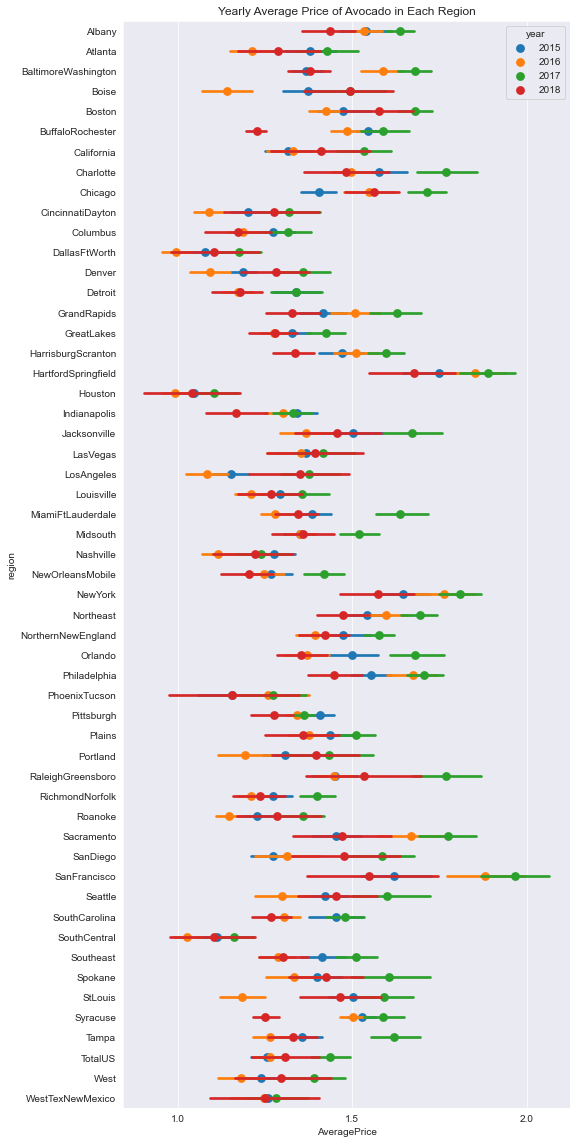

In [14]:
plt.figure(figsize=(8,20))
sns.set_style('darkgrid')
plt.title("Yearly Average Price of Avocado in Each Region")
plt.xticks(np.linspace(1,2,3))
sns.pointplot(y="region",x="AveragePrice",hue="year",data=df,join=False)

Average Price of Avocado are high in SanFrancisco and low in Houston in year 2017.
Average Price of Avocado are high in HartfordSpringfield and low in Houston in year 2018.

<AxesSubplot:title={'center':'Avocado Type Average Price in Each Region'}, xlabel='AveragePrice', ylabel='region'>

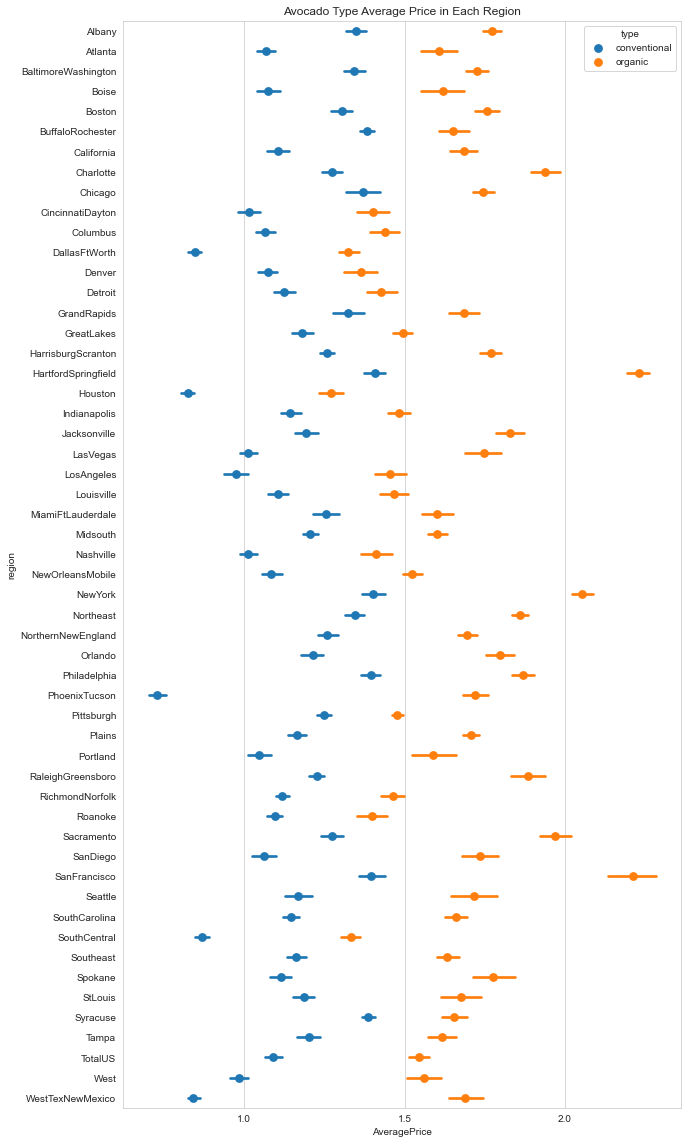

In [15]:
plt.figure(figsize=(10,20))
sns.set_style('whitegrid')
plt.title("Avocado Type Average Price in Each Region")
plt.xticks(np.linspace(1,2,3))
sns.pointplot(y="region",x="AveragePrice",hue="type",data=df,join=False)

SanFranciso and HartfordSpringfield have high Average price of Organic Avocado
Conventional Avocado have Average Price range between 1$ to 1.5$ in most of the counties.
Organic Avocado have Average Price range between 1.5$ to 2.0$ in most of the countries.
PhoenixTucson have low Average price of Conventional Avocado

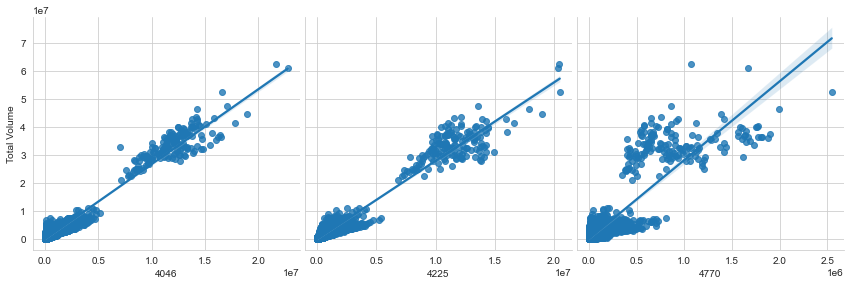

In [16]:
# 4046:Small/Medium volume of Avocado,4225:Large Volume of Avocado,4770:XLarge volume of Avocado

#Total volume vs 4046,4225,4770
sns.pairplot(df,x_vars=[4046,4225,4770],y_vars='Total Volume',size=4,aspect=1,kind='reg')

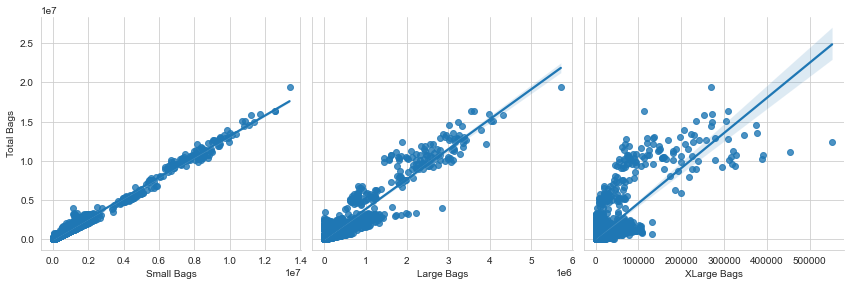

In [17]:
#Total Bags vs Small bags,Large Bags and XLarge Bags

sns.pairplot(df,x_vars=['Small Bags','Large Bags','XLarge Bags'],y_vars='Total Bags',size=4,aspect=1,kind='reg')

High Correlation between Total Volume vs 4046(small/medium volume of avocado) and Total Bags vs Small bags
Low correlation between Total Volume vs 4770(XLarge volume of avocado) and Total bags vs Xlarge Bags

<AxesSubplot:>

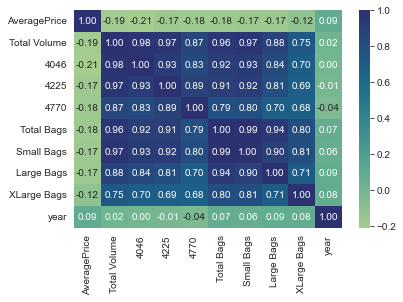

In [18]:
sns.heatmap(df.corr(),cmap='crest',annot=True,fmt=".2f")

# CLASSIFICATION MODEL

In [19]:
le = LabelEncoder()
d = {}
le.fit(df.type.drop_duplicates()) 
d['type'] = list(le.classes_)
df.type = le.transform(df.type)

In [20]:
df['region'] = le.fit_transform(df['region'])

In [21]:
x=df[['AveragePrice',4046,4225,4770,'Small Bags',
         'Large Bags',  'XLarge Bags','type']]
y=df.region

In [22]:
# split the data into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=32)
print("xtrain shape:",xtrain.shape)
print("ytrain shape:",ytrain.shape)
print("xtest shape:",xtest.shape)
print("ytest shape:",ytest.shape)

xtrain shape: (14599, 8)
ytrain shape: (14599,)
xtest shape: (3650, 8)
ytest shape: (3650,)


In [23]:
#logistic Regression

lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

print("Accuracy score for Logistic Regression:\n",accuracy_score(ytest,ypred))
print("confusion matrix for Logistic Regression:\n",confusion_matrix(ytest,ypred))
print("Classification report of Logistic Regression:\n",classification_report(ytest,ypred))

Accuracy score for Logistic Regression:
 0.16082191780821917
confusion matrix for Logistic Regression:
 [[ 1  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  2  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  1  0]
 [ 0  0  0 ...  9 35  0]
 [ 2  0  0 ...  1  6  6]]
Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.07      0.01      0.02        76
           1       0.11      0.04      0.06        67
           2       0.50      0.33      0.39        83
           3       0.00      0.00      0.00        62
           4       0.09      0.10      0.09        59
           5       0.06      0.14      0.08        78
           6       0.14      0.39      0.20        67
           7       0.00      0.00      0.00        67
           8       0.62      0.34      0.44        67
           9       0.14      0.48      0.22        82
          10       0.00      0.00      0.00        73
          11       0.00      0.00      0.00 

In [24]:
#Decision Tree Classifier

dtc=tree.DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)

print("Accuracy score for Decision Tree Classifier:\n",accuracy_score(ytest,ypred))
print("confusion matrix for Decision Tree Classifier:\n",confusion_matrix(ytest,ypred))
print("Classification report of Decision Tree Classifier:\n",classification_report(ytest,ypred))

Accuracy score for Decision Tree Classifier:
 0.795068493150685
confusion matrix for Decision Tree Classifier:
 [[60  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 70 ...  0  0  2]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 74  1]
 [ 0  0  1 ...  0  0 48]]
Classification report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        76
           1       0.82      0.75      0.78        67
           2       0.93      0.84      0.89        83
           3       0.83      0.81      0.82        62
           4       0.83      0.81      0.82        59
           5       0.67      0.68      0.68        78
           6       0.98      0.94      0.96        67
           7       0.81      0.82      0.81        67
           8       0.89      0.84      0.86        67
           9       0.81      0.79      0.80        82
          10       0.67      0.75      0.71        73
          11       0.88      0.

In [25]:
#Random Forest Classifier

rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

print("Accuracy score for Random Forest Regression:\n",accuracy_score(ytest,ypred))
print("confusion matrix for Random Forest Regression:\n",confusion_matrix(ytest,ypred))
print("Classification report of Random Forest Regression:\n",classification_report(ytest,ypred))

Accuracy score for Random Forest Regression:
 0.9002739726027398
confusion matrix for Random Forest Regression:
 [[69  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 82 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  0  1 ...  0  0 53]]
Classification report of Random Forest Regression:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        76
           1       0.91      0.79      0.85        67
           2       0.96      0.99      0.98        83
           3       0.98      0.89      0.93        62
           4       0.95      0.93      0.94        59
           5       0.84      0.79      0.82        78
           6       0.97      0.97      0.97        67
           7       0.89      0.88      0.89        67
           8       0.98      0.93      0.95        67
           9       0.92      0.85      0.89        82
          10       0.79      0.86      0.82        73
          11       0.95      0

WE DO 3 CLASSIFICATION MODEL AND FIND THE ACCURACY SCORE
lOGISTIC REGRESSION         :16%
DECISION TREE CLASSIFICATION:79%
RANDOM FOREST CLASSIFICATION:89%
    
"RANDOM FOOREST CLASSIFIER GIVE HIGH ACCURACY SCORE"

In [26]:
region = pd.DataFrame({'Region':ytest , 'Predicted Region':ypred},columns=['Region','Predicted Region'])
region

,Region,Predicted Region
11042,36,36
11381,43,36
11028,36,36
3456,12,12
17105,44,44
...,...,...
875,16,16
11967,0,0
10418,24,24
7810,41,41


# REGRESSION MODEL

In [27]:
features=[4046,4225,4770,'Small Bags','Large Bags','XLarge Bags','type']
X=df[features]
Y=df['AveragePrice']

In [28]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20,random_state=32)
print("Xtrain shape:",Xtrain.shape)
print("Ytrain shape:",Ytrain.shape)
print("Xtest shape:",Xtest.shape)
print("Ytest shape:",Ytest.shape)

Xtrain shape: (14599, 7)
Ytrain shape: (14599,)
Xtest shape: (3650, 7)
Ytest shape: (3650,)


In [29]:
#standard scaler
scaler=StandardScaler()
scaler.fit(Xtrain)
Xtrainscaled= scaler.transform(Xtrain)
Xtestscaled=scaler.transform(Xtest)

Mean Absolute Error: 0.2352010147806018
Mean Squared Error: 0.09320284512179002
Root Mean Squared Error: 0.30529141016705663


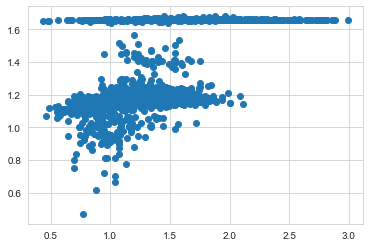

In [30]:
#LinearRegression

lir=LinearRegression()
lir.fit(Xtrain,Ytrain)
Ypred=lir.predict(Xtest)

print("Mean Absolute Error:",mean_absolute_error(Ytest,Ypred))
print("Mean Squared Error:",mean_squared_error(Ytest,Ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Ytest,Ypred)))
plt.scatter(Ytest,Ypred)

Mean Absolute Error: 0.1792054794520548
Mean Squared Error: 0.07536887671232877
Root Mean Squared Error: 0.2745339263412243


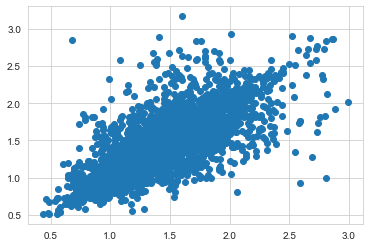

In [31]:
#Decisiontree

dtr=tree.DecisionTreeRegressor()
dtr.fit(Xtrain,Ytrain)
Ypred=dtr.predict(Xtest)

print("Mean Absolute Error:",mean_absolute_error(Ytest,Ypred))
print("Mean Squared Error:",mean_squared_error(Ytest,Ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Ytest,Ypred)))
plt.scatter(Ytest,Ypred)

Mean Absolute Error: 0.13408726027397258
Mean Squared Error: 0.03652426101643835
Root Mean Squared Error: 0.1911132151800036


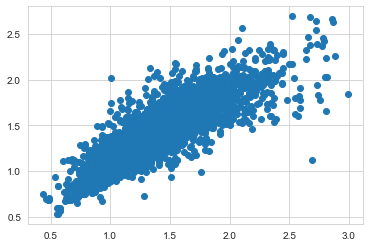

In [32]:
#Random Forest

rf=RandomForestRegressor()
rf.fit(Xtrain,Ytrain)
Ypred=rf.predict(Xtest)

print("Mean Absolute Error:",mean_absolute_error(Ytest,Ypred))
print("Mean Squared Error:",mean_squared_error(Ytest,Ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Ytest,Ypred)))
plt.scatter(Ytest,Ypred)

I have done 3 Regression model
-Linear Regression
-Decision Tree
-Random Forest

Root Mean Squared Error is Very less in Random forest.So,it is the best model to find out average price.

,Average Price,Predicted Average Price
11042,1.38,1.6068
11381,1.70,1.4303
11028,1.50,1.6716
3456,1.04,1.0020
17105,1.86,1.7746


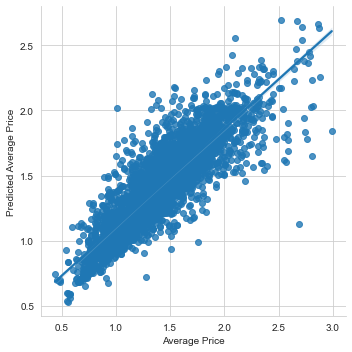

In [33]:
price = pd.DataFrame({'Average Price':Ytest , 'Predicted Average Price':Ypred,},columns=['Average Price','Predicted Average Price'])
sns.lmplot(x='Average Price',y='Predicted Average Price',data=price,palette='deep')
price.head()

In [34]:
price.shape

(3650, 2)

In [35]:
data = pd.DataFrame({'Average Price':Ytest , 'Predicted Average Price':Ypred,'Region':ytest,'Predicted Region':ypred},columns=['Average Price','Predicted Average Price','Region','Predicted Region'])
data

,Average Price,Predicted Average Price,Region,Predicted Region
11042,1.38,1.6068,36,36
11381,1.70,1.4303,43,36
11028,1.50,1.6716,36,36
3456,1.04,1.0020,12,12
17105,1.86,1.7746,44,44
...,...,...,...,...
875,1.07,1.1891,16,16
11967,1.78,1.6526,0,0
10418,1.92,1.8959,24,24
7810,1.34,1.2463,41,41


In [36]:
import joblib

rf = RandomForestRegressor()
rf.fit(X,Y)

# Save the trained model to a file
joblib.dump(rf, 'AvocadoAveragePrice.joblib')

# Load the model from a file
loaded_model = joblib.load('AvocadoAveragePrice.joblib')

# Use the loaded model to make predictions
Ypred = loaded_model.predict(Xtest)

In [37]:
rf = RandomForestRegressor()
rf.fit(x,y)

# Save the trained model to a file
joblib.dump(rf, 'AvocadoRegion.joblib')

# Load the model from a file
loaded_model = joblib.load('AvocadoRegion.joblib')

# Use the loaded model to make predictions
ypred = loaded_model.predict(xtest)